In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
import io
import pandas as pd
import numpy as np

data = np.genfromtxt('train.dat')
data1 = np.genfromtxt('test.dat')

In [4]:
data

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [5]:
def binary_to_decimal(data, row):
    binary1=''
    binary2=''

    for i in data[row][64:68]:
        binary1 += str(int(i))

    for j in data[row][68:72]:
        binary2 += str(int(j))

    p = int(binary1, 2)
    q = int(binary2, 2)

    return [p, q]

In [6]:
train_data = []
for row in range(60000):
    challenge = np.append(np.append(data[row][0:64], binary_to_decimal(data, row)), data[row][-1])
    train_data.append(challenge)

In [7]:
test_data = []
for row in range(40000):
    challenge = np.append(np.append(data1[row][0:64], binary_to_decimal(data1, row)), data1[row][-1])
    test_data.append(challenge)

In [8]:
train_data = np.array(train_data)

In [9]:
test_data = np.array(test_data)

In [48]:
np.shape(train_data[0])

(67,)

In [47]:
a = np.empty((0, 65), float)

In [53]:
a = np.append(a, np.array([np.delete(train_data[0], [64, 65])]), axis=0)
a = np.append(a, np.array([np.delete(train_data[1], [64, 65])]), axis=0)
a = np.append(a, np.array([np.delete(train_data[2], [64, 65])]), axis=0)
a = np.append(a, np.array([np.delete(train_data[3], [64, 65])]), axis=0)
a

array([[0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0

In [11]:
# def create_feature(X_train):
#     X = []
#     for challenge in X_train:
#         temp = []
#         for val in challenge:
#             temp.append(1-val)
#             temp.append(val)
#     # temp.append(1)
#         X.append(temp)

#     X = np.array(X)
#     return X

# def create_feature(X_train):
#     X = []
#     for challenge in X_train:
#         temp = []
#         for val in challenge:
#             if val == 1.0:
#                 temp.append(val)
#             elif val == 0.0:
#                 temp.append(-1.0)
#         temp.append(1)
#         X.append(temp)

#     X = np.array(X)
#     return X

def create_feature(data):
    for challenge in data:
        np.append(challenge, 1.0)
    return data


In [12]:
trial_data1 = [] # when select bit is (p, q),
trial_data2 = [] # when select bit is (q, p). here p<q

for challenge in train_data:
    if (list(challenge[64:66]) == [1.0, 3.0]):
        trial_data1.append(challenge)
    if (list(challenge[64:66]) == [3.0, 1.0]):
        trial_data2.append(challenge)

trial_data1 = np.array(trial_data1)
trial_data2 = np.array(trial_data2)

In [81]:
trial_data = []

for challenge in train_data:
    if (list(challenge[64:66]) == [0.0, 1.0]):
        trial_data.append(challenge)
    if (list(challenge[64:66]) == [1.0, 0.0]):
        check_challenge = challenge
        check_challenge[64:66] = [0.0, 1.0]
        a = [list(item) for item in trial_data]
        if list(check_challenge) not in a:
            challenge[-1] = 1.0 - challenge[-1]
            trial_data.append(challenge)

trial_data = np.array(trial_data)

In [82]:
trial_data = np.delete(trial_data, [64, 65], axis=1)

In [83]:
print(trial_data)
np.shape(trial_data)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


(478, 65)

In [84]:
# np.shape(create_feature(trial_data[:, :-1]))
# # np.shape(trial_data[:, :-1])

In [85]:
np.count_nonzero(trial_data[:, -1])

215

In [44]:
del trial_data, trial_data1, trial_data2

In [75]:
# def fit(model, Z_train):
#   # for select bit p and q
#   for p in range(0, 15):
#     for q in range(p+1, 16):
# #       trial_data1 = [] # when select bit is (p, q),
# #       trial_data2 = [] # when select bit is (q, p). here p<q

# #       for challenge in Z_train:
# #         if (list(challenge[64:66]) == [float(p), float(q)]):
# #           trial_data1.append(challenge)
# #         if (list(challenge[64:66]) == [float(q), float(p)]):
# #           trial_data2.append(challenge)

# #       trial_data1 = np.array(trial_data1)
# #       trial_data2 = np.array(trial_data2)
#         trial_data = []

# #         for challenge in train_data:
# #             if (list(challenge[64:66]) == [float(p), float(q)]):
# #                 trial_data.append(challenge)
# #             if (list(challenge[64:66]) == [float(q), float(p)]):
# #                 check_challenge = challenge
# #                 check_challenge[64:66] = [float(p), float(q)]
# #                 a = [list(item) for item in trial_data]
# #                 if list(check_challenge) not in a:
# #                     challenge[-1] = 1.0 - challenge[-1]
# #                     trial_data.append(challenge)


#         for challenge in train_data:
#             if (list(challenge[64:66]) == [float(q), float(p)]):
#                 trial_data.append(challenge)
#             if (list(challenge[64:66]) == [float(p), float(q)]):
#                 check_challenge = challenge
#                 check_challenge[64:66] = [float(q), float(p)]
#                 a = [list(item) for item in trial_data]
#                 if list(check_challenge) not in a:
#                     challenge[-1] = 1.0 - challenge[-1]
#                     trial_data.append(challenge)

#         trial_data = np.array(trial_data)

#         trial_data = np.delete(trial_data, [64, 65], axis=1)
        
        
        
#         X = create_feature(trial_data[:, :-1])
#         y = trial_data[:,-1]

# #         sm = SMOTE(random_state=42)
# #         X_res, y_res = sm.fit_resample(X, y)
        
# #         trial_data2 = np.delete(trial_data2, [64, 65], axis=1)
# #         trial_data2[:,-1] = 1.0-trial_data2[:,-1]

#         key = str(p)+'$'+str(q)

#         model[key].fit(X, y)
# #       model[key].fit(create_feature(trial_data2[:, :-1]), trial_data2[:,-1])
def fit(model, Z_train):
#     model = {}
#     Z_train = transform_train_data(Z_train)

    trn_data = {}

    for challenge in Z_train:
        p = int(challenge[64])
        q = int(challenge[65])
        key = None
        if p<q:
            key = str(p) + '$' + str(q)
        else:
            key = str(q) + '$' + str(p)

        if trn_data.get(key) is None:
            trn_data[key] = np.empty((0, 65), float)

        challenge = np.delete(challenge, [64, 65])
        if p<q:
            trn_data[key] = np.append(trn_data[key], np.array([challenge]), axis=0)
        else:
            challenge[-1] = 1.0 - challenge[-1]
            trn_data[key] = np.append(trn_data[key], np.array([challenge]), axis=0)

    for key, data in trn_data.items():
#         if model.get(key) is None:
#             model[key] = LogisticRegression(C=100, max_iter=500)
        X = create_feature(data[:, :-1])
        y = data[:, -1]

        model[key].fit(X, y)

    return model

In [76]:
def predict(model, Z_test):
    predicted_response = []

    for challenge in Z_test[:, :-1]:
        p = int(challenge[64])
        q = int(challenge[65])

        challenge = np.delete(challenge, [64, 65])

        if(p<q):
            key = str(p)+'$'+str(q)
            predicted_response.append((model[key].predict(create_feature([challenge])))[0])
#             predicted_response.append(1.0-(model[key].predict(create_feature([challenge])))[0])
        else:
            key = str(q)+'$'+str(p)
            predicted_response.append(1.0-(model[key].predict(create_feature([challenge])))[0])
#             predicted_response.append((model[key].predict(create_feature([challenge])))[0])


    predicted_response = np.array(predicted_response)
    return predicted_response

In [74]:
    u = {}

    for challenge in train_data:
        p = int(challenge[64])
        q = int(challenge[65])
        key = None
        if p<q:
            key = str(p) + '$' + str(q)
        else:
            key = str(q) + '$' + str(p)

        if u.get(key) is None:
            u[key] = np.empty((0, 65), float)

        challenge = np.delete(challenge, [64, 65])
        if p<q:
            u[key] = np.append(u[key], np.array([challenge]), axis=0)
        else:
            challenge[-1] = 1.0 - challenge[-1]
            u[key] = np.append(u[key], np.array([challenge]), axis=0)

    for key, data in u.items():
        print(key, data)
#         if model.get(key) is None:
#             model[key] = LogisticRegression(C=100, max_iter=500)
#         X = create_feature(data[:, :-1])
#         y = data[:, -1]

#         model[key].fit(X, y)

#     return model

2$3 [[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
0$2 [[0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 0. 0.]]
2$5 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]]
1$11 [[0. 1. 0. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
1$9 [[1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]
4$15 [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
2$11 [[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 

In [66]:
train_data

array([[ 0.,  0.,  0., ...,  2.,  3.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  1.],
       [ 0.,  0.,  0., ...,  2.,  5.,  0.],
       ...,
       [ 1.,  0.,  0., ..., 15.,  3.,  0.],
       [ 0.,  0.,  1., ..., 13.,  7.,  1.],
       [ 1.,  1.,  0., ..., 11., 14.,  1.]])

In [77]:
from sklearn.svm import LinearSVC
model1 = {}

for p in range(0, 15):
    for q in range(p+1, 16):
        key = str(p)+'$'+str(q)
        model1[key] = LinearSVC(loss = 'hinge', C=100, max_iter=10000)

In [78]:
fit(model1, train_data)

D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: Convergenc

D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3distribution\envs\gpu2\lib\site-packages\sklearn\svm\_base.py:1225: Convergenc

{'0$1': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$2': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$3': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$4': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$5': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$6': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$7': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$8': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$9': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$10': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$11': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$12': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$13': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$14': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '0$15': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '1$2': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '1$3': LinearSVC(C=100, loss='hinge', max_iter=10000),
 '1$4': LinearSVC(C=100, loss='hinge', max

In [86]:
training_response = train_data[:, -1]
print(training_response)

[0. 1. 0. ... 0. 1. 1.]


In [87]:
predicted_training_response = predict(model1, train_data)

In [88]:
print(predicted_training_response)

[1. 0. 1. ... 1. 0. 0.]


In [90]:
print(np.average(predicted_training_response == training_response))

0.0023666666666666667


In [91]:
actual_response = test_data[:, -1]
actual_response

array([0., 1., 0., ..., 1., 1., 1.])

In [92]:
predicted_response1 = predict(model1, test_data)
predicted_response1

array([0., 0., 1., ..., 0., 0., 0.])

In [93]:
print(np.average(predicted_response1 == actual_response))

0.061925


In [68]:
from sklearn.linear_model import LogisticRegression
model2 = {}

for p in range(0, 15):
    for q in range(p+1, 16):
        key = str(p)+'$'+str(q)
        model2[key] = LogisticRegression(C=100, max_iter=1000 )

In [69]:
fit(model2, train_data)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [20]:
predicted_training_response2 = predict(model2, train_data)

In [21]:
print(np.average(predicted_training_response2 == training_response))

1.0


In [22]:
predicted_response2 = predict(model2, test_data)
predicted_response2

array([1., 1., 0., ..., 1., 1., 1.])

In [25]:
print(np.average(predicted_response2 == actual_response))

0.949425


In [50]:
accuracy_score(actual_response, predicted_response2)

0.949425

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
model2_report = classification_report(actual_response, predicted_response2)

In [53]:
print(model2_report)

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     20200
         1.0       0.95      0.95      0.95     19800

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000



In [52]:
confusion_matrix(actual_response, predicted_response2)

array([[19185,  1015],
       [ 1008, 18792]], dtype=int64)

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [33]:
model2_average_precision = average_precision_score(actual_response, predicted_response2)
print('Average precision recall score: {:.2f}'.format(model2_average_precision))

Average precision recall score: 0.93


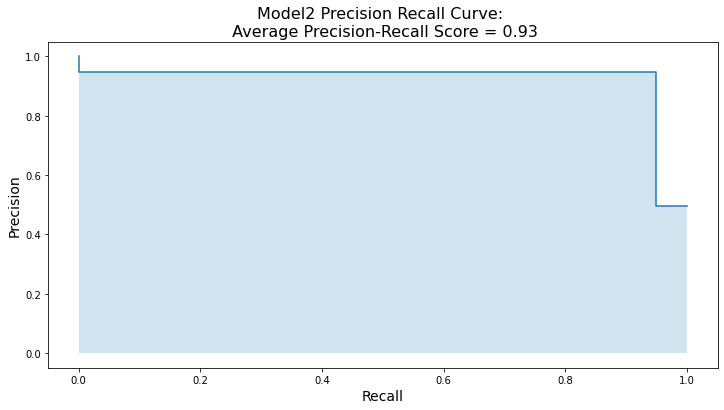

In [35]:
plt.figure(figsize=(12, 6))
precision, recall, _ = precision_recall_curve(actual_response, predicted_response2)

plt.step(recall, precision, alpha=1, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
# plt.xlim([0, 1.01])
# plt.ylim([0, 0.04])
plt.title('Model2 Precision Recall Curve: \n Average Precision-Recall Score = {:.2f}'.format(model2_average_precision), fontsize=16)
plt.show()

In [38]:
model2_fpr, model2_tpr, model2_threshold = roc_curve(training_response, predicted_training_response2)

In [72]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n 4 Best Performing Classifier', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(model2_fpr, model2_tpr, label='Logistic Regression Score: {:.3f}'.format(roc_auc_score(actual_response, predicted_training_response2))
# plt.annotate('Minimum ROC score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.4), arrowprops=dict(facecolor='grey'))
# plt.legend()
# plt.show()

SyntaxError: unexpected EOF while parsing (125004746.py, line 9)

In [68]:
from sklearn.svm import SVC
model3 = {}

for p in range(0, 15):
    for q in range(p+1, 16):
        key = str(p)+'$'+str(q)
        model3[key] = SVC(C=1000, max_iter=10000)

In [69]:
fit(model3, train_data)

In [70]:
predicted_response3 = predict(model3, test_data)
predicted_response3

array([0., 1., 0., ..., 1., 1., 1.])

In [71]:
print(np.average(predicted_response3 == actual_response))

0.90535


In [119]:
from sklearn.neighbors import KNeighborsClassifier

model4 = {}

for p in range(0, 15):
    for q in range(p+1, 16):
        key = str(p)+'$'+str(q)
        model4[key] = KNeighborsClassifier(n_neighbors=3)

In [120]:
fit(model4, test_data)

In [123]:
# predicted_response4 = predict(model4, test_data)
# predicted_response4

# #takes too long

In [ ]:
print(np.average(predicted_response4 == actual_response))

In [18]:
from sklearn.linear_model import RidgeCV

model5 = {}

for p in range(0, 15):
    for q in range(p+1, 16):
        key = str(p)+'$'+str(q)
        model5[key] = RidgeCV(alphas=np.logspace(-6, 6, 13))

In [19]:
fit(model5, train_data)

In [23]:
predicted_response5 = predict(model5, test_data)


36726

In [26]:
np.floor(predicted_response5)

array([ 0.,  0., -1., ...,  0.,  1.,  1.])

In [27]:
print(np.average(predicted_response5 == actual_response))

0.0


In [39]:
single_model = LogisticRegression(C=100, max_iter=1000)

In [49]:
Z_train = np.delete(train_data, [64, 65], axis=1)
X = Z_train[:, :-1]
y = Z_train[:,-1]

single_model.fit(X, y)

LogisticRegression(C=100, max_iter=1000)

In [51]:
Z_test = np.delete(test_data, [64, 65], axis=1)

In [53]:
np.shape(Z_test)

(40000, 65)

In [54]:
X_test = Z_test[:, :-1]
y_test = Z_test[:,-1]

y_pred = single_model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.501525


In [57]:
y_pred

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
def fit(model, Z_train):
  # for select bit p and q
  for p in range(0, 15):
    for q in range(p+1, 16):

        trial_data = []

        for challenge in train_data:
            if (list(challenge[64:66]) == [float(p), float(q)]):
                trial_data.append(challenge)
            if (list(challenge[64:66]) == [float(q), float(p)]):
                check_challenge = challenge
                check_challenge[64:66] = [float(p), float(q)]
                a = [list(item) for item in trial_data]
                if list(check_challenge) not in a:
                    challenge[-1] = 1.0 - challenge[-1]
                    trial_data.append(challenge)

        trial_data = np.array(trial_data)

        trial_data = np.delete(trial_data, [64, 65], axis=1)
        
                
        X = create_feature(trial_data[:, :-1])
        y = trial_data[:,-1]


        key = str(p)+'$'+str(q)

        model[key].fit(X, y)
        
        return model

In [ ]:
    predicted_response = []

    for challenge in Z_test[:, :-1]:
        p = int(challenge[64])
        q = int(challenge[65])

        challenge = np.delete(challenge, [64, 65])

        if(p<q):
            key = str(p)+'$'+str(q)
            predicted_response.append((model[key].predict(create_feature([challenge])))[0])
        else:
            key = str(q)+'$'+str(p)
            predicted_response.append(1.0-(model[key].predict(create_feature([challenge])))[0])

    predicted_response = np.array(predicted_response)
    return predicted_response